<a href="https://colab.research.google.com/github/hexe007/pro_12/blob/main/ind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Aim of the project: Implement the AI techniques to automate verification of produced sensors.
# Characteristics will be verified in order to configure by:
# Air, Water, Isopropanol

# Essential Exploratory data analysis (EDA),analyze and investigate data sets and summarize their main characteristics.

import pandas as pd
import numpy as np

In [3]:
# Plotting Packages, appealing plots to present data in the most simple and effective way.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing

In [4]:
# Machine Learning Packages
    #Matplotlib - for plotting data in graphs and charts
    #NLTK - natural language toolkit for working with text
    #pandas - the premier data analysis tool for Python
    #scikit-learn - simplifies the implementation of different algorithms
    #Seaborn - for making statistical graphs
    #Numpy - for multi-dimensional array and matrix processing
    #Keras - high-level API that greatly simplifies working with TensorFlow
    #SciPy - for easy handling of mathematical operations
    #PyTorch - simplifies the creation of neural networks using dynamic graphs
    #TensorFlow - simplifies the creation of neural networks using static graphs

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import f

In [5]:
#Load data from data source
#I am loading a txt files containig a mix data.
#I want to store them in an object where I can access each element.

path = 'https://raw.githubusercontent.com/hexe007/pro_12/main/sesion/'  #path to the data content
prefix = 'sesion_'                                                      
ref = '_20'
extension = '.txt'

prefix_number = 10 #number of given file sets to be loaded, 2 digits with leading 0

medium_validation = np.array(['air', 'water', 'izopropanol']) #array of given validation medium
medium_collection = {}                                        #dictionary for data set

prefix_number_array = []                                      #array with number of sets with leading zero                                  

for x in range(prefix_number):                      
  x += 1
  prefix_number_array.append(str(x).zfill(2))                 # .zfill leading zero function

for i in medium_validation:
  for x in prefix_number_array:
    url = path + prefix  + x + ref + '/sensor' + x + '_' + i + extension  #combine variables in to url path
    medium_collection[i, x] = pd.read_csv(url, names=['Amplitude', 'Wavelength'])  #creating dictionary with pandas 



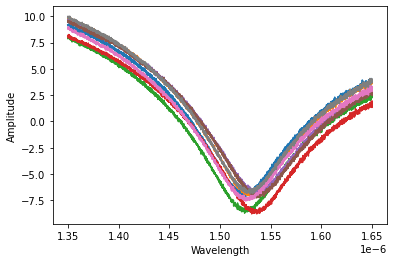

In [6]:
# Plotting training data set for air
for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:  #for loop _p_n -prefix number-variable
  arr = medium_collection['air', _p_n].values                  #arr-array with values from data set
  x = arr[:,0:1]
  y = arr[:,1]
  plt.ylabel("Amplitude")
  plt.xlabel("Wavelength")
  plt.plot(x,y)

 

Graphical way of presenting data - no significant discrepancies in data (between data sets).

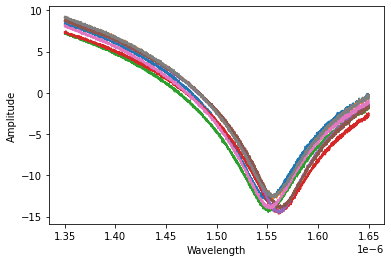

In [7]:
# Plotting training data set for water
for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:
  arr = medium_collection['water', _p_n].values
  x = arr[:,0:1]
  y = arr[:,1]
  plt.ylabel("Amplitude")
  plt.xlabel("Wavelength")
  plt.plot(x,y)

# Graphical way of presenting data - no significant discrepancies in data (between data sets).

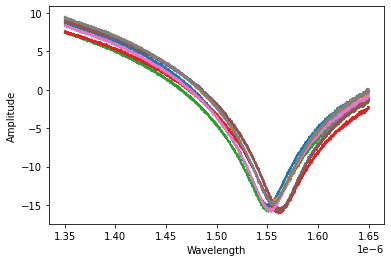

In [8]:
# Plotting training data set for izopropanol
for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:
  arr = medium_collection['izopropanol', _p_n].values
  x = arr[:,0:1]
  y = arr[:,1]
  plt.ylabel("Amplitude")
  plt.xlabel("Wavelength")
  plt.plot(x,y)

#Graphical way of presenting data - no significant discrepancies in data (between data sets).

In [47]:
#Filling in data into variables
app_air = []
app_water = []
app_izo = []

for _p_n in ['01', '02', '03', '04', '05', '06', '07', '08']:  #loop through data sets
  
  app_air.append(medium_collection['air', _p_n])               #combine data sets from different mediums
  app_water.append(medium_collection['water', _p_n])
  app_izo.append(medium_collection['izopropanol', _p_n])

air_products = pd.concat(app_air)                              #concating into one value set for training
water_products = pd.concat(app_water)
izo_products = pd.concat(app_izo)

model_water = LinearRegression()                               #linear regression model creation
model_water.fit(air_products, water_products)                  #fitting model (water against air)

model_izo = LinearRegression()                                 #linear regression model creation             
model_izo.fit(air_products, izo_products)                      #fitting model (izopropanol against air)

print(len(air_products))                
print(len(water_products))
print(len(izo_products))

24008
24008
24008


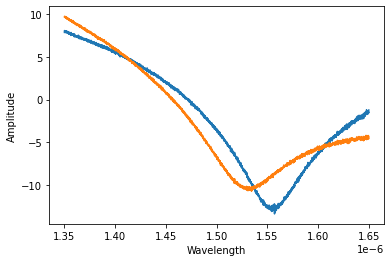

In [50]:
#predicting water and izopropanol results from air dataset on trained model

water_orig = medium_collection['water', '09'].values
x = water_orig[:,0:1]
y = water_orig[:,1]
plt.ylabel("Amplitude")
plt.xlabel("Wavelength")
plt.plot(x,y)

water_predict = model_water.predict(medium_collection['air', '09'])

x = water_predict[:,0:1]
y = water_predict[:,1]
plt.ylabel("Amplitude")
plt.xlabel("Wavelength")
plt.plot(x,y)

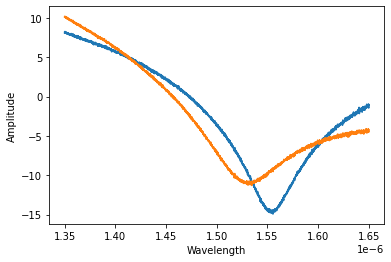

In [51]:
izo_orig = medium_collection['izopropanol', '09'].values
x = izo_orig[:,0:1]
y = izo_orig[:,1]
plt.ylabel("Amplitude")
plt.xlabel("Wavelength")
plt.plot(x,y)

izo_predict = model_izo.predict(medium_collection['air', '09'])
x = izo_predict[:,0:1]
y = izo_predict[:,1]
plt.ylabel("Amplitude")
plt.xlabel("Wavelength")
plt.plot(x,y)


In [10]:
#R-squared root can be used for validating sensors
y_pred = model_water.predict(medium_collection['air', '09'])  #water model predicted in air set nr 09

r2 = r2_score(medium_collection['water', '09'], y_pred)        
print('R-squared:', r2)

y_pred = model_water.predict(medium_collection['air', '10'])  #water model predicted in air set nr 10

r2 = r2_score(medium_collection['water', '10'], y_pred)
print('R-squared:', r2)



R-squared: 0.9467506210419174
R-squared: 0.944012070490239


In [11]:
#we can use R-squared to validate possible output from sensors
y_pred = model_water.predict(air_products)

r2 = r2_score(water_products, y_pred)
print('R-squared:', r2)


R-squared: 0.9451318994956107


In [12]:
y_pred = model_izo.predict(medium_collection['air', '09'])

r2 = r2_score(medium_collection['izopropanol', '09'], y_pred)
print('R-squared:', r2)

y_pred = model_water.predict(medium_collection['air', '10'])

r2 = r2_score(medium_collection['water', '10'], y_pred)
print('R-squared:', r2)

R-squared: 0.9363841626885119
R-squared: 0.944012070490239


In [13]:
y_pred = model_water.predict(air_products)

r2 = r2_score(izo_products, y_pred)
print('R-squared:', r2)

R-squared: 0.9315612171793475


R-squared: -1.137652858174674


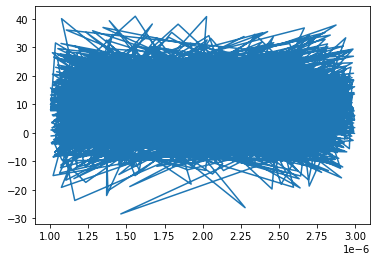

In [26]:
#randomly generated dataset to test R-squared root 
n_rows = 3001

col1 = np.random.uniform(low=0.000001, high=0.000003, size=n_rows)
col2 = np.random.normal(9, 10, size=n_rows)

df = pd.DataFrame({'Amplitude':col1, 'Wavelength':col2 })

y_pred = model_water.predict(medium_collection['air', '10'])

r2 = r2_score(df, y_pred)
print('R-squared:', r2)

plt.plot(col1, col2)